In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


**Import helpful Libaries**

In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline
import warnings   # To ignore any warnings
warnings.filterwarnings("ignore")

**Import Dataset**

In [3]:
df = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# let get each columns unique value and there values of int64 and bool
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'bool':
        print("{} values: {}".format(col,df[col].unique()))

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  8

In [7]:
# int64 and float64 columns describe
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* Dataset Contain 12330 rows and 18 columns
* Also Dataset have bool(2), float64(7), int64(7), object(2)
* Target Variable have bool values, so it is a binary classification problem
* We don't have any null values

**Target Variable**

In [9]:
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

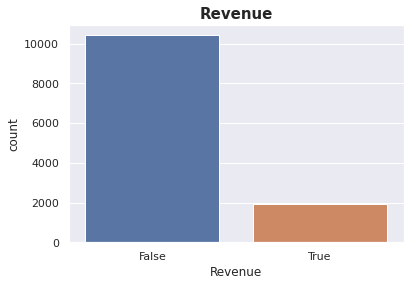

In [10]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()

* 84% of values in Revenue is false.

**Handling Some Categorical Colmuns**
* In dataset **Operating system, Browser and Region** have numercial value, by which we can't give proper opinion and anaylsis the data. so we google top list for Operating system, Browser and Region and replace that value with numerical values.

In [11]:
# Here we change Opearting system value from numerical to caterogical
# Data is take from Google.
df.loc[df['OperatingSystems'] == 1,'OperatingSystems'] = 'IOS'
df.loc[df['OperatingSystems'] == 2,'OperatingSystems'] = 'Android Mobile'
df.loc[df['OperatingSystems'] == 3,'OperatingSystems'] = 'Windows'
df.loc[df['OperatingSystems'] == 4,'OperatingSystems'] = 'Linux'
df.loc[df['OperatingSystems'] == 5,'OperatingSystems'] = 'MS-DOS'
df.loc[df['OperatingSystems'] == 6,'OperatingSystems'] = 'Fedora'
df.loc[df['OperatingSystems'] == 7,'OperatingSystems'] = 'Ubuntu'
df.loc[df['OperatingSystems'] == 8,'OperatingSystems'] ='Solaris'

In [12]:
# Here we change Browser value from numerical to caterogical
# Data is take from Google. Top 10 list of browser.
df.loc[df['Browser'] == 1,'Browser'] = 'Firefox'
df.loc[df['Browser'] == 2,'Browser'] = 'Google Chrome'
df.loc[df['Browser'] == 3,'Browser'] = 'Microsoft Edge'
df.loc[df['Browser'] == 4,'Browser'] = 'Apple Safari'
df.loc[df['Browser'] == 5,'Browser'] = 'Opera'
df.loc[df['Browser'] == 6,'Browser'] = 'Brave'
df.loc[df['Browser'] == 7,'Browser'] = 'UCBrowser'
df.loc[df['Browser'] == 8,'Browser'] = 'DuckDuckgo'
df.loc[df['Browser'] == 9,'Browser'] = 'Chromium'
df.loc[df['Browser'] == 10,'Browser'] = 'Epic'
df.loc[df['Browser'] == 11,'Browser'] = 'Internet Explorer'
df.loc[df['Browser'] == 12,'Browser'] = 'Tor Browser'
df.loc[df['Browser'] == 13,'Browser'] = 'Maxthon'

In [13]:
# Here we change Region value from numerical to caterogical
# Data is take from Google. Top 10 country where internet is used most.
df.loc[df['Region'] == 1,'Region'] = 'China'
df.loc[df['Region'] == 2,'Region'] = 'Indonesia'
df.loc[df['Region'] == 3,'Region'] = 'India'
df.loc[df['Region'] == 4,'Region'] = 'United States'
df.loc[df['Region'] == 5,'Region'] = 'Brazil'
df.loc[df['Region'] == 6,'Region'] = 'Nigeria'
df.loc[df['Region'] == 7,'Region'] = 'Japan'
df.loc[df['Region'] == 8,'Region'] = 'Russia'
df.loc[df['Region'] == 9,'Region'] = 'Bangladesh'

**EDA [Exploratory Data Analysis]**

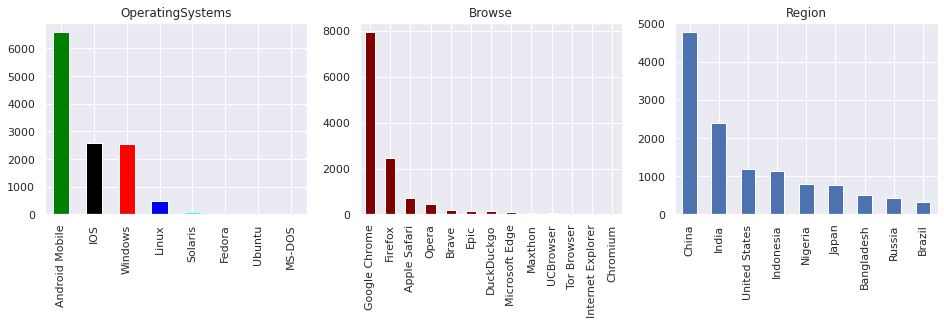

In [14]:
# Independed variable [caterogical]
plt.figure(1)
plt.subplot(331) 
df['OperatingSystems'].value_counts().plot.bar(figsize=(16,12), title= 'OperatingSystems', color=['green', 'black', 'red', 'blue', 'cyan'])

plt.subplot(332) 
df['Browser'].value_counts().plot.bar(title= 'Browse', color='maroon')

plt.subplot(333)
df['Region'].value_counts().plot.bar(title= 'Region') 

plt.show()

* Best Operating System for website is **Android Mobile, IOS and Windows**. Almost 95% of World Population is using this 3 operating system which is good for website.
* **Google Chrome** is used by most the people to access website.
* **China and India** have half of the world population. but we have to work for russia and brazil.

<AxesSubplot:title={'center':'TrafficType'}>

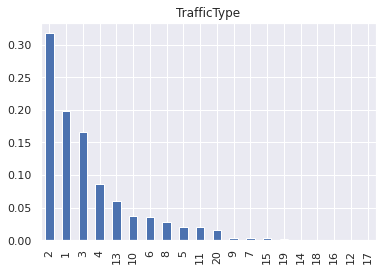

In [15]:
df['TrafficType'].value_counts(normalize=True).plot.bar(title= 'TrafficType')

<AxesSubplot:title={'center':'Weekend'}>

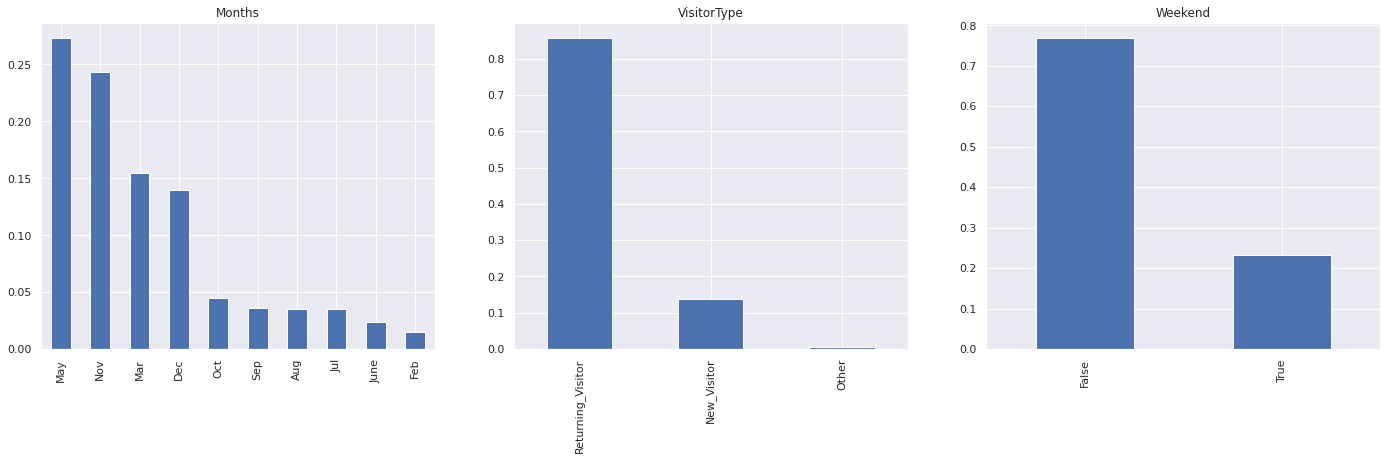

In [16]:
# Independed variable [ordinal]
plt.figure(1) 
plt.subplot(131) 
df['Month'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Months')

plt.subplot(132) 
df['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'VisitorType')

plt.subplot(133) 
df['Weekend'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Weekend')

* May and Nov months have more visitor compare to other months
* On website people visit more and more so dataset contain more returning visitor
* people visit site in non weekend days

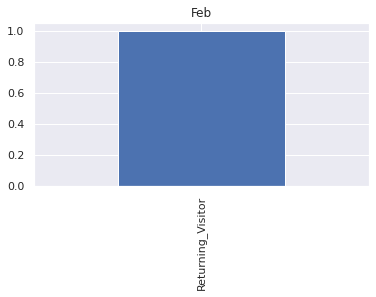

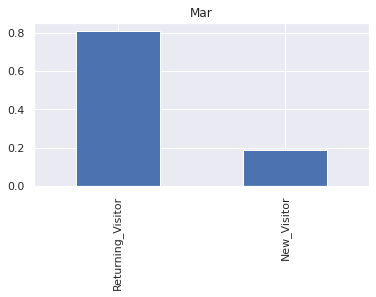

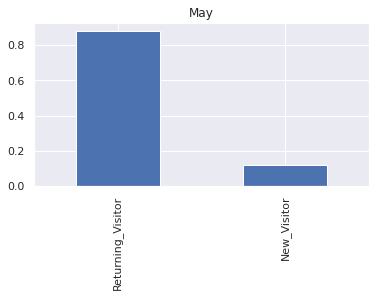

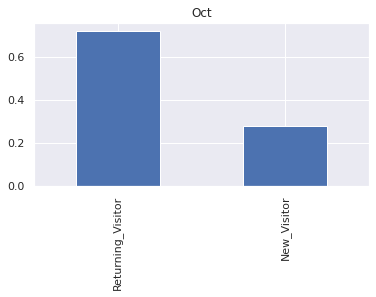

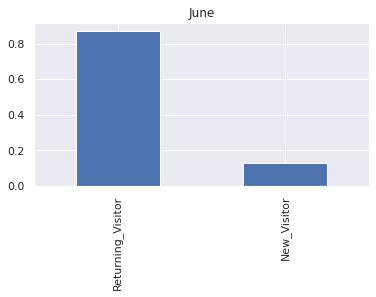

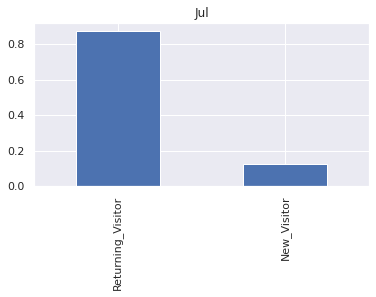

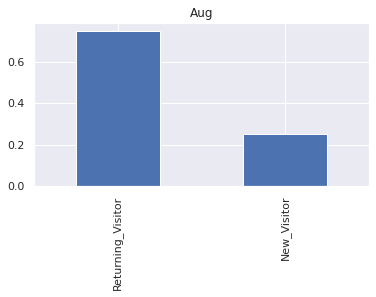

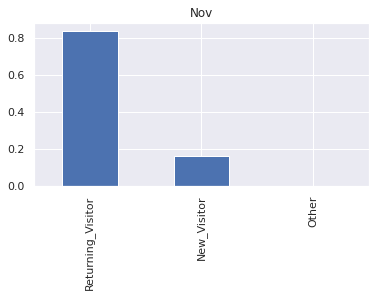

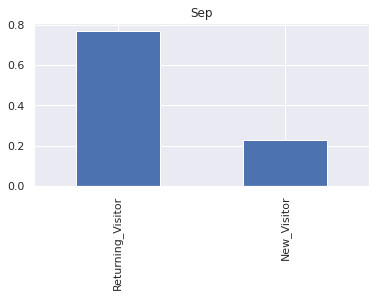

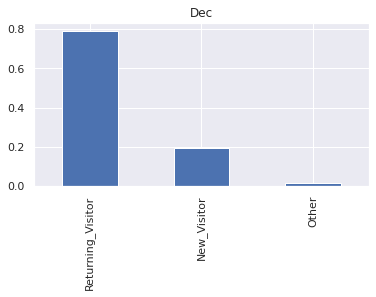

In [17]:
for col in df['Month'].unique():
    month = df['Month'] == col
    week = df['Weekend'] == True
    a = month & week
    b = df.loc[a]
    plt.figure(222)
    b['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(6,3), title= col)
    plt.show()

In [18]:
a = df.groupby('Month')
b = df.loc[(df['Month'] == 'May') & (df['Weekend'] == True) & (df['Revenue'] == True)]
b['VisitorType'].value_counts()

Returning_Visitor    76
New_Visitor          23
Name: VisitorType, dtype: int64

<AxesSubplot:xlabel='Revenue'>

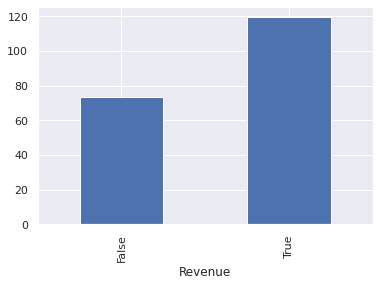

In [19]:
df.groupby('Revenue')['Administrative_Duration'].mean().plot.bar()

<AxesSubplot:xlabel='Month'>

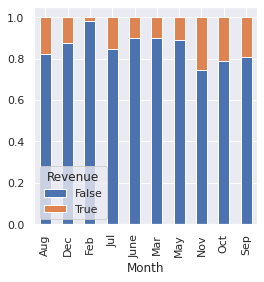

In [20]:
revenue=pd.crosstab(df['Month'],df['Revenue']) 
revenue.div(revenue.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

* Here we see that, In Nov people buy things from website. But in Feb people don't buy, and in feb highest people are return visitor. So we have to do something to increase transcation in feb month.

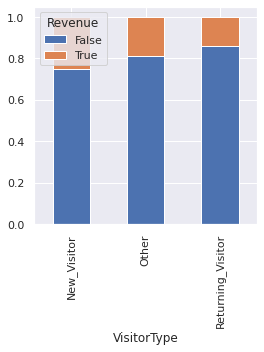

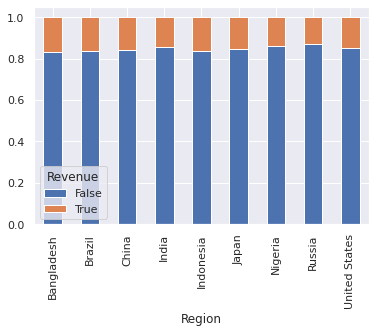

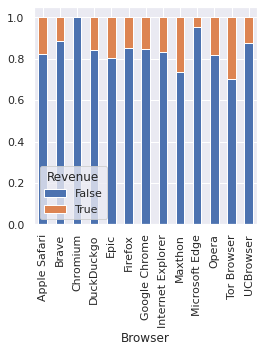

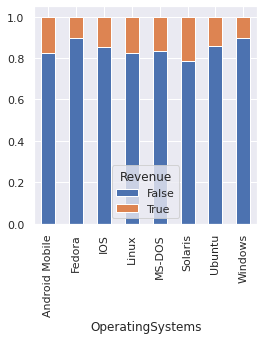

In [21]:
visitortype=pd.crosstab(df['VisitorType'],df['Revenue']) 
region=pd.crosstab(df['Region'],df['Revenue'])
browser=pd.crosstab(df['Browser'],df['Revenue'])
operatingsys=pd.crosstab(df['OperatingSystems'],df['Revenue'])

visitortype.div(visitortype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
browser.div(browser.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
operatingsys.div(operatingsys.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Revenue'>

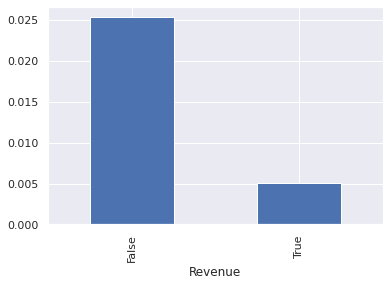

In [22]:
df.groupby('Revenue')['BounceRates'].mean().plot.bar()

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

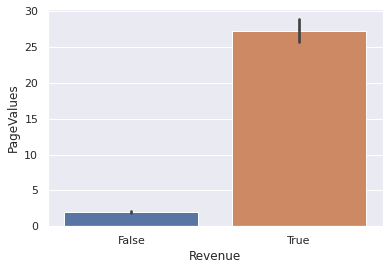

In [23]:
sns.barplot(x='Revenue', y='PageValues', data=df)

* Page Value is an important feature in this dataset. It contain most of the true values. Increase in page value, increase in transcation.

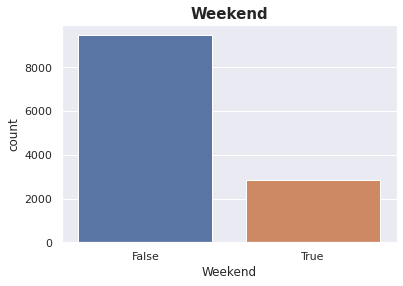

In [24]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Weekend')
plt.title('Weekend', fontsize=15, fontweight='bold')
plt.show()

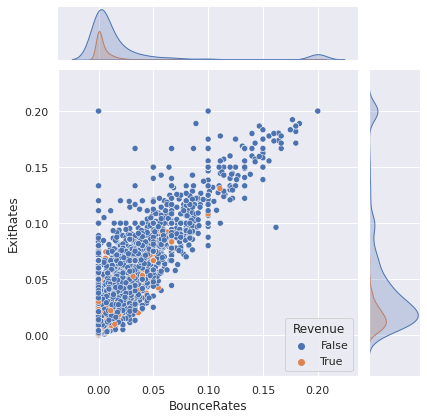

In [25]:
sns.jointplot(data=df, x="BounceRates", y="ExitRates", hue="Revenue")

<AxesSubplot:ylabel='Density'>

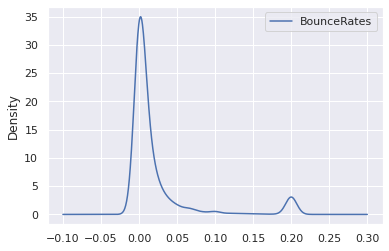

In [26]:
df.plot(x='PageValues', y='BounceRates', kind='kde')

<AxesSubplot:ylabel='Density'>

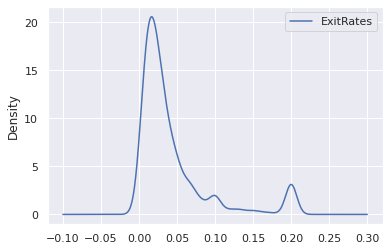

In [27]:
df.plot(x='PageValues', y='ExitRates', kind='kde')

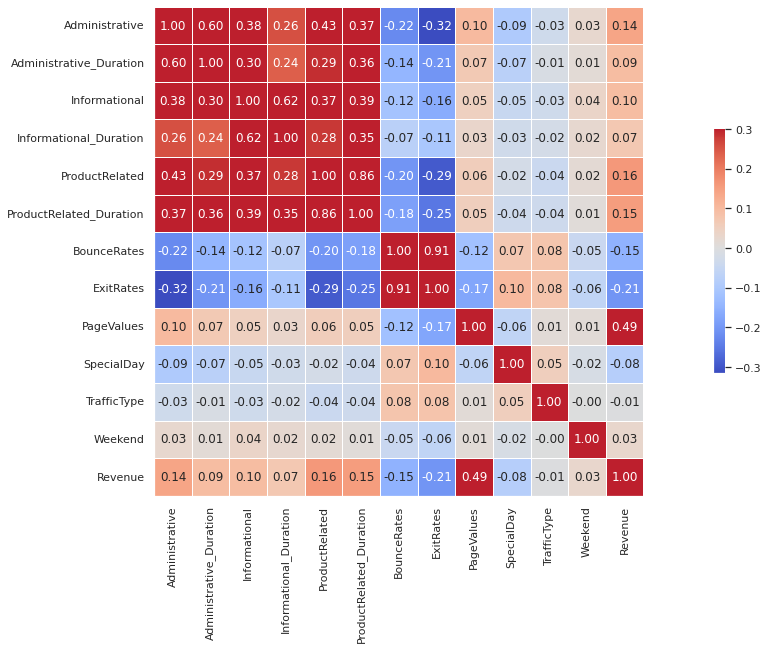

In [28]:
corr = df.corr()
g = sns.heatmap(corr, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(25,9)
plt.show()

* Here page value and revenue are very related to each other.

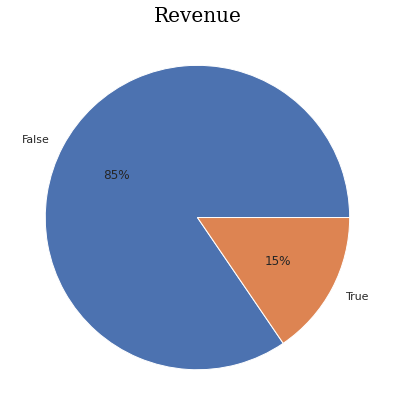

In [29]:
a = ((df['Revenue'] == False).sum() / df['Revenue'].count() * 100), ((df['Revenue'] == True).sum() / df['Revenue'].count() * 100)
font1 = {'family':'serif','color':'black','size':20}
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(a, labels = df['Revenue'].unique(),explode = [0, 0], autopct='%1.0f%%')
plt.title("Revenue", fontdict = font1)
plt.show()

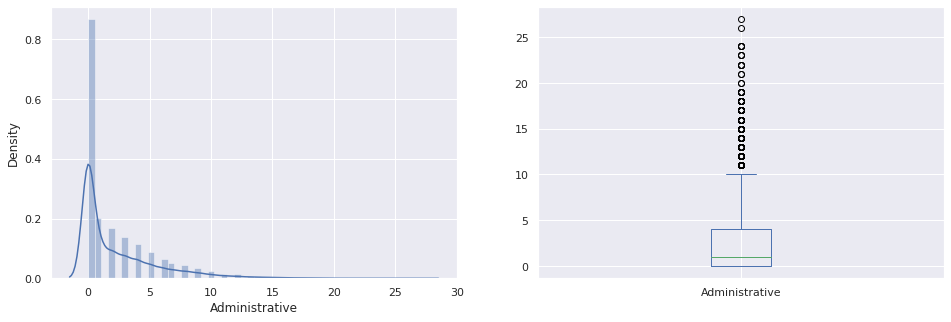

In [30]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Administrative']); 
plt.subplot(122)
df['Administrative'].plot.box(figsize=(16,5)) 
plt.show()

* Many important feature contain outliers.

**Handling Outliers**

First we select the columns with contain outliers, than we BOXCOX method to remove outliers from that columns and replace that value to that columns too. Create a for loop to make this process easy. 

Administrative process is completed


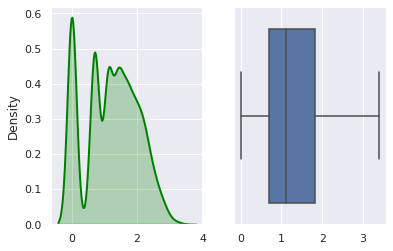

Administrative_Duration process is completed


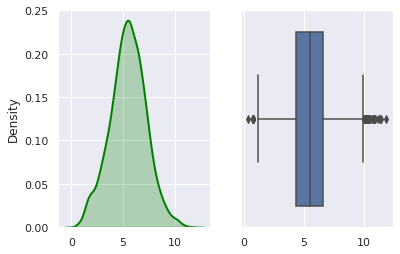

Informational process is completed


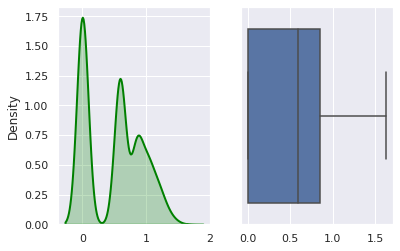

Informational_Duration process is completed


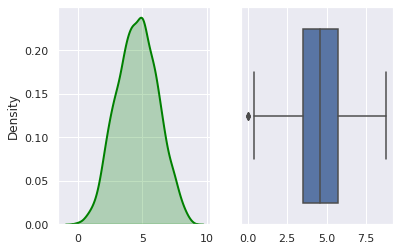

ProductRelated process is completed


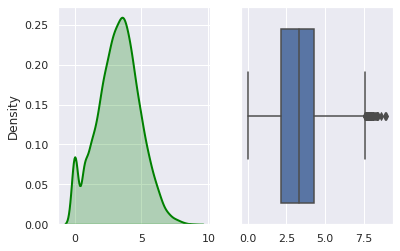

ProductRelated_Duration process is completed


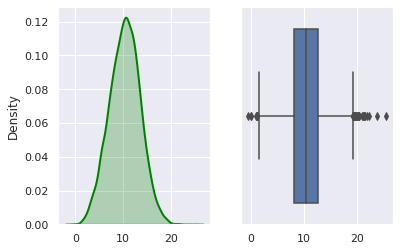

BounceRates process is completed


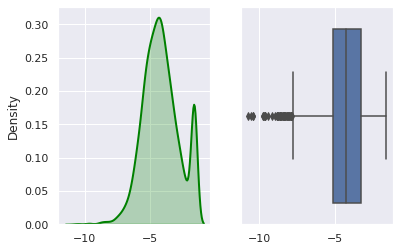

PageValues process is completed


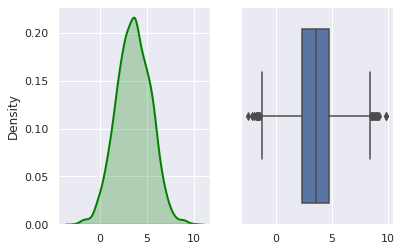

SpecialDay process is completed


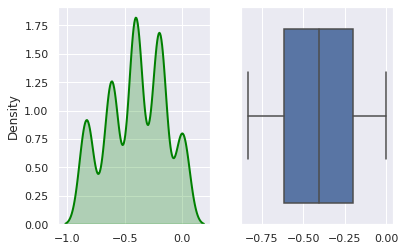

TrafficType process is completed


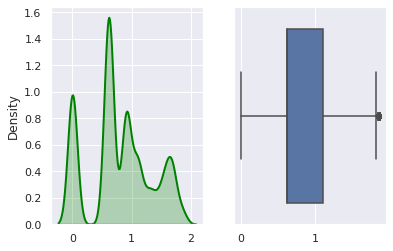

In [31]:
from scipy import stats

# transform training data & save lambda value
df_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'TrafficType']
for col in df_list:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        posdata = df[col][df[col] > 0]
        col_data, fitted_lambda = stats.boxcox(posdata)
        
  
        # creating axes to draw plots
        fig, ax = plt.subplots(1,2)


        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = "Normal", color ="green", ax = ax[0])
        df.loc[df[col] > 0, col] = col_data
        print('{} process is completed'.format(col))

        plt.subplot(122)
        sns.boxplot(col_data)
        plt.show()

Clear 95& of outliers from dataset.

**Machine Learning**

In [32]:
X = df.drop(['Revenue'], axis=1) # Features
y = df['Revenue'] # Label

X.shape, y.shape

((12330, 17), (12330,))

In [33]:
# Change bool and object value in label encoder
from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['Revenue'])
        

X_enc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,0.20,0.0,0.0,2,2,5,2,0.000000,2,0
1,0.0,0.0,0.0,0.0,0.714971,5.562811,0.000000,0.10,0.0,0.0,2,0,6,2,0.615029,2,0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,0.20,0.0,0.0,2,3,5,0,0.911034,2,0
3,0.0,0.0,0.0,0.0,0.714971,1.048043,-3.017749,0.14,0.0,0.0,2,7,6,4,1.096844,2,0
4,0.0,0.0,0.0,0.0,2.555460,10.217742,-3.949623,0.05,0.0,0.0,2,7,9,2,1.096844,2,1


In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1908
Before OverSampling, counts of label '0': 10422 

After OverSampling, the shape of train_X: (20844, 17)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size =0.3)

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14590, 17), (14590,), (6254, 17), (6254,))

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test = model.predict(x_test)
lr_test = accuracy_score(y_test,pred_test)

In [38]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_enc,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X_enc.loc[train_index],X_enc.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1, solver='liblinear')     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
# pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.894566098945661

2 of kfold 5
accuracy_score 0.8990267639902676

3 of kfold 5
accuracy_score 0.8925385239253852

4 of kfold 5
accuracy_score 0.8880778588807786

5 of kfold 5
accuracy_score 0.8803730738037308


In [39]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

# training a knn model
model.fit(x_train,y_train)
kn_train = model.score(x_train, y_train)
kn_test = model.score(x_test, y_test)

In [40]:
# SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
sv_train = svc.score(x_train, y_train)
sv_test = svc.score(x_test, y_test)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def dt_classifer(X, y):
    list = []
    # Split data in train_test_split
    print("First we split data with train_test_split and kfolds: ")
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
    # Find best parameters for decision tree
    print("Lets findout best parameters for decision tree: ")
    dt_classifier = DecisionTreeClassifier()
    param_dist = {"max_depth": [3, 10],
              "random_state": [3, 11],
              "max_features": range(1, 11),
            "splitter": ["best", "random"], 
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}
    random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train, y_train)
    print("best parameters: ", random_search.best_params_)
    print("best parameters score: ", random_search.best_score_ * 100)
    # Save the dict in list
    for v in random_search.best_params_.values():
        list.append(v)
    
    # Give parameters to Decision tree with train_test_split
    print("Now we use this parameters in our model: ")
    dt_classifier = DecisionTreeClassifier(splitter= list[0], random_state=list[1], min_samples_split=list[2], max_features=list[3], max_depth=list[4], criterion=list[5])
    dt_classifier.fit(X_train, y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
    
    dt_train_acc = cross_val_score(dt_classifier, X_train, y_train)
    print("Model Accuracy with train_test_split: ", dt_test_accuracy * 100)
    
    # Give same parameters to kfold splitting
    kfolds = KFold(n_splits=10, random_state=7, shuffle=True)
    model = DecisionTreeClassifier(splitter= list[0], random_state=list[1], min_samples_split=list[2], max_features=list[3], max_depth=list[4], criterion=list[5])
    score = cross_val_score(model, X, y, cv=kfolds)
    print("Accuracy of model with Kfolds: ",(score.mean()*100))

dt_classifer(X_train_res, y_train_res)

First we split data with train_test_split and kfolds: 
Lets findout best parameters for decision tree: 
best parameters:  {'splitter': 'best', 'random_state': 3, 'min_samples_split': 7, 'max_features': 8, 'max_depth': 10, 'criterion': 'entropy'}
best parameters score:  88.31391363947908
Now we use this parameters in our model: 
Model Accuracy with train_test_split:  88.61528621682123
Accuracy of model with Kfolds:  88.78333034148497


In [42]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(x_train, y_train)
preds_valid = xgb.predict(x_test)
xgb_train =  xgb.score(x_train, y_train)
xgb_test = xgb.score(x_test, y_test)

[06:09:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
rf_train = clf.score(x_train, y_train)
rf_test = clf.score(x_test, y_test)

In [44]:
data = {'Algorithms':['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'XGBClassifier', 'RandomForestClassifier'], 
        'Train':['0', kn_train, sv_train, xgb_train, rf_train],
       'Test':[lr_test, kn_test, sv_test, xgb_test, rf_test]}
 
# Calling DataFrame constructor
a = pd.DataFrame(data)
 
    
print(a)

               Algorithms     Train      Test
0      LogisticRegression         0  0.846338
1    KNeighborsClassifier  0.911515  0.897026
2                     SVC  0.848458  0.858331
3           XGBClassifier  0.994106  0.935721
4  RandomForestClassifier       1.0  0.932683


In [45]:
clf.feature_importances_

array([0.04359678, 0.04469827, 0.01261767, 0.01751139, 0.06619445,
       0.0720746 , 0.03171528, 0.09108767, 0.42017514, 0.00486058,
       0.04925377, 0.01425638, 0.01407841, 0.02148626, 0.06664892,
       0.01863884, 0.01110557])

<AxesSubplot:>

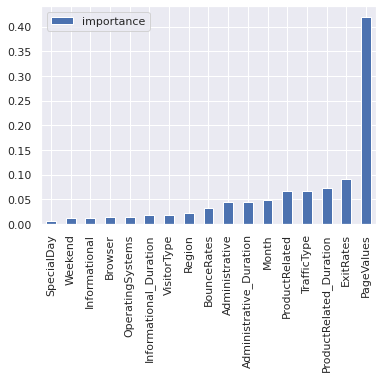

In [46]:
feature_importance = pd.DataFrame({'importance': clf.feature_importances_}, index= X_enc.columns).sort_values('importance')
feature_importance.plot.bar()

In [47]:
# data only with important feature
x = df[['BounceRates', 'Administrative', 'Administrative_Duration', 'PageValues', 'Month', 'TrafficType', 
        'ExitRates', 'ProductRelated', 'ProductRelated_Duration']]
y = df['Revenue'] # Label

x.shape, y.shape

((12330, 9), (12330,))

In [48]:
# Change bool and object value in label encoder
from sklearn.preprocessing import LabelEncoder
X_enc = x.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['Revenue'])
        

X_enc.head()

,BounceRates,Administrative,Administrative_Duration,PageValues,Month,TrafficType,ExitRates,ProductRelated,ProductRelated_Duration,OperatingSystems,Browser,Region,VisitorType,Weekend
0,-1.615778,0.0,0.0,0.0,2,0.000000,0.20,0.000000,0.000000,2,5,2,2,0
1,0.000000,0.0,0.0,0.0,2,0.615029,0.10,0.714971,5.562811,0,6,2,2,0
2,-1.615778,0.0,0.0,0.0,2,0.911034,0.20,0.000000,0.000000,3,5,0,2,0
3,-3.017749,0.0,0.0,0.0,2,1.096844,0.14,0.714971,1.048043,7,6,4,2,0
4,-3.949623,0.0,0.0,0.0,2,1.096844,0.05,2.555460,10.217742,7,9,2,2,1


In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1908
Before OverSampling, counts of label '0': 10422 

After OverSampling, the shape of train_X: (20844, 14)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size =0.3)

In [51]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
sv_train = svc.score(x_train, y_train)
sv_test = svc.score(x_test, y_test)

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(x_train, y_train)
preds_valid = xgb.predict(x_test)
xgb_train =  xgb.score(x_train, y_train)
xgb_test = xgb.score(x_test, y_test)

[06:10:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
rf_train = clf.score(x_train, y_train)
rf_test = clf.score(x_test, y_test)

In [54]:
data = {'Algorithms':['SVC', 'XGBClassifier', 'RandomForestClassifier'], 
        'Train':[sv_train, xgb_train, rf_train],
       'Test':[sv_test, xgb_test, rf_test]}
 
# Calling DataFrame constructor
a = pd.DataFrame(data)
 
    
print(a)

               Algorithms     Train      Test
0                     SVC  0.849349  0.848737
1           XGBClassifier  0.993831  0.934282
2  RandomForestClassifier  1.000000  0.929325
